# Comparison of Walch _et al_ to Disordered Sleepers data

In [1]:
from typing import List
from matplotlib import pyplot as plt
import numpy as np

In [2]:
WASA_THRESHOLD = 0.93
BALANCE_WEIGHTS = True

### Comparison: WASA93, ROC AUC, Cohen's Kappa

* WASA93: <u>W</u>ake <u>A</u>ccuracy when <u>S</u>leep <u>A</u>ccuracy is fixed at <u>93%</u>

In [3]:
from pisces.utils import pad_to_hat, plot_scores_CDF, plot_scores_PDF, add_rocs

In [4]:
import matplotlib.pyplot as plt

from pisces.data_sets import DataSetObject


sets = DataSetObject.find_data_sets("../data_sets")
mo = 

walch = sets['walch_et_al']
disordered = sets['hf_disordered']

In [5]:
from pisces.models import MOResUNetPretrained
from pisces.utils import split_analysis


mo = MOResUNetPretrained(sampling_hz=32)


# Walch et al. data set

## (MO) Pretrained UNet evaluation
We have the trained weights from Mads Olsen et al.'s _ResUNet_ model, saved as a tensorflow lite model with a wrapper for our system. This section calls that on accelerometer recordings in the `'walch_et_al'` data set.

In [6]:
# uses all processors on your CPU to preprocess the accelerometer into spectrograms
# takes ~ 50 sec on M1 Pro (10core)
evaluations_walch, mo_preprocessed_data_walch = mo.evaluate_data_set(walch)
mo_aucs_walch = [e["auc"] for e in evaluations_walch.values()]
mo_fprs_walch = [e["roc_curve"]["fprs"] for e in evaluations_walch.values()]
mo_tprs_walch = [e["roc_curve"]["tprs"] for e in evaluations_walch.values()]


Using 16 of 16 cores (100%) for parallel preprocessing.
This can cause memory or heat issues if  is too high; if you run into problems, call prepare_set_for_training() again with max_workers = -1, going more negative if needed. (See the docstring for more info.)


getting needed X, y for 1066528
sampling hz: 32
resampling to 32Hz (0.03125s) from 49 Hz (0.02001s)
getting needed X, y for 1360686
sampling hz: 32
getting needed X, y for 1455390
getting needed X, y for 2638030
resampling to 32Hz (0.03125s) from 49 Hz (0.02001s)
getting needed X, y for 1449548
getting needed X, y for 4314139
sampling hz: 32
sampling hz: 32
resampling to 32Hz (0.03125s) from 50 Hz (0.01999s)
getting needed X, y for 4018081
sampling hz: 32
resampling to 32Hz (0.03125s) from 50 Hz (0.01988s)
sampling hz: 32
getting needed X, y for 2598705
resampling to 32Hz (0.03125s) from 50 Hz (0.01986s)
getting needed X, y for 3509524
sampling hz: 32
resampling to 32Hz (0.03125s) from 50 Hz (0.01998s)
getting needed X, y for 3997827
sampling hz: 32
resampling to 32Hz (0.03125s) from 66 Hz (0.01502s)
sampling hz: 32
resampling to 32Hz (0.03125s) from 66 Hz (0.01501s)
getting needed X, y for 1818471
getting needed X, y for 4426783
getting needed X, y for 5383425
resampling to 32Hz (0.03

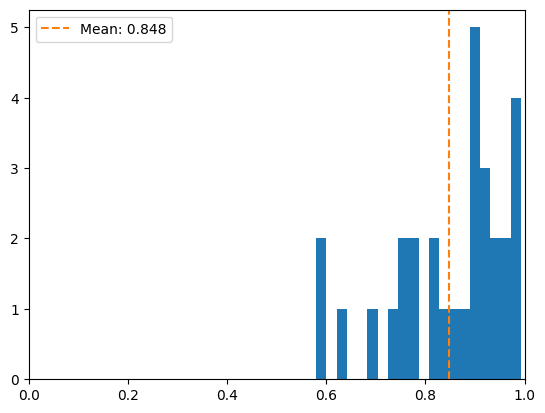

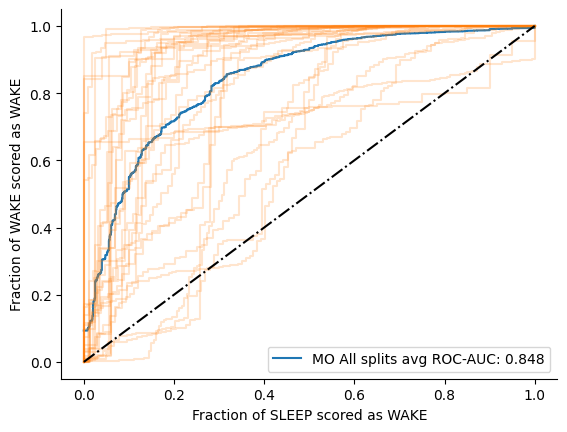

In [8]:
plot_scores_PDF(mo_aucs_walch)

add_rocs(mo_fprs_walch, mo_tprs_walch, roc_group_name="MO")

# Disordered Sleepers

In [6]:
# uses all processors on your CPU to preprocess the accelerometer into spectrograms
# takes ~ 50 sec on M1 Pro (10core)
# Exclude AWS009 and AWS032 for data issues. Found by brute-force checking each ID.
evaluations_disordered, mo_preprocessed_data_disordered = mo.evaluate_data_set(disordered, exclude=['AWS009', 'AWS032'])
mo_aucs_disordered = [e["auc"] for e in evaluations_disordered.values()]
mo_fprs_disordered = [e["roc_curve"]["fprs"] for e in evaluations_disordered.values()]
mo_tprs_disordered = [e["roc_curve"]["tprs"] for e in evaluations_disordered.values()]


Using 16 of 16 cores (100%) for parallel preprocessing.
This can cause memory or heat issues if  is too high; if you run into problems, call prepare_set_for_training() again with max_workers = -1, going more negative if needed. (See the docstring for more info.)
getting needed X, y for AWS016
getting needed X, y for AWS013
getting needed X, y for AWS002
getting needed X, y for AWS010
getting needed X, y for AWS001
getting needed X, y for AWS008
sampling hz: 32
sampling hz: 32
sampling hz: 32
sampling hz: 32
resampling to 32Hz (0.03125s) from 50 Hz (0.02000s)
resampling to 32Hz (0.03125s) from 50 Hz (0.02000s)
resampling to 32Hz (0.03125s) from 50 Hz (0.02000s)
resampling to 32Hz (0.03125s) from 50 Hz (0.02000s)
sampling hz: 32
getting needed X, y for AWS014
getting needed X, y for AWS005
resampling to 32Hz (0.03125s) from 50 Hz (0.02000s)
sampling hz: 32
resampling to 32Hz (0.03125s) from 50 Hz (0.02000s)
getting needed X, y for AWS011
sampling hz: 32
resampling to 32Hz (0.03125s) from

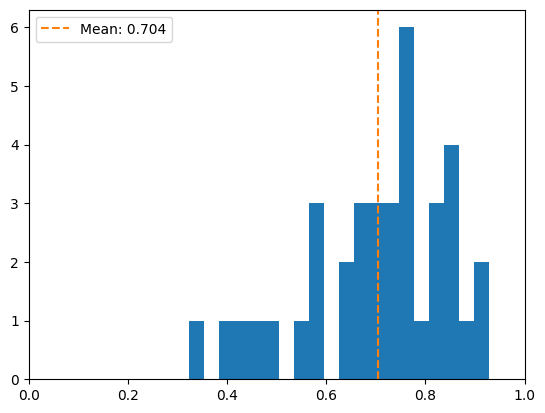

In [7]:
plot_scores_PDF(mo_aucs_disordered)

# add_rocs(mo_aucs_disordered, mo_aucs_disordered, roc_group_name="MO")

### debugging

In [8]:
import random


(X, y), id  = mo_preprocessed_data_disordered[1]
print("X.shape =", X.shape)
spec = X[0, 1:, :, 0].T

print("spec.shape =", spec.shape)


X.shape = (1, 15360, 32, 2)
spec.shape = (32, 15359)


In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


def plot_spectrogram(preprocessed_data, idx):
    (X, y), id = preprocessed_data[idx]
    spec = X[0, 1:, :, 0].T

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

    img = ax1.imshow(spec, origin="lower", aspect="auto")#, vmin=vmin, vmax=vmax)
    ax1.set_title('Spectrogram, Time : Freq')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Freq')

    axins = inset_axes(ax1,
                    width="5%",  # width = 5% of parent_bbox width
                    height="75%",  # height : 50%
                    loc='center right')

    plt.colorbar(img, cax=axins, orientation="vertical")

    ax3.plot(spec)
    ax3.set_title('Spectrogram, Frequency : Power ')
    ax3.set_xlabel('Freq')
    ax3.set_ylabel('Power')
    ax3.set_xlim(0, 31)#spec.shape[0])


    ax2.plot(spec.T)
    ax2.set_title('Spectrogram, Time : Power')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Power')
    ax2.set_xlim(0, spec.shape[1])

    plt.tight_layout(pad=0.3)
    fig.suptitle(f"Subject {id}")
    plt.show()


In [10]:

def plot_predictions(evaluations, y_time, idx):
    y_pad = evaluations[idx]["y_padded"][:len(y_time)]
    y_pred = evaluations[idx]["y_hat"][:len(y_time)]
    y_mask = evaluations[idx]["mask"][:len(y_time)]

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(y_time, y_pad, label="True")
    ax.plot(y_time, y_pred, label="Predicted")
    ax.plot(y_time, y_mask, label="Mask")
    ax.legend(loc='upper right')

/var/folders/h4/pg7xmblx74zbp2yhls4bc_mh0000gn/T/ipykernel_49182/4131756062.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.3)


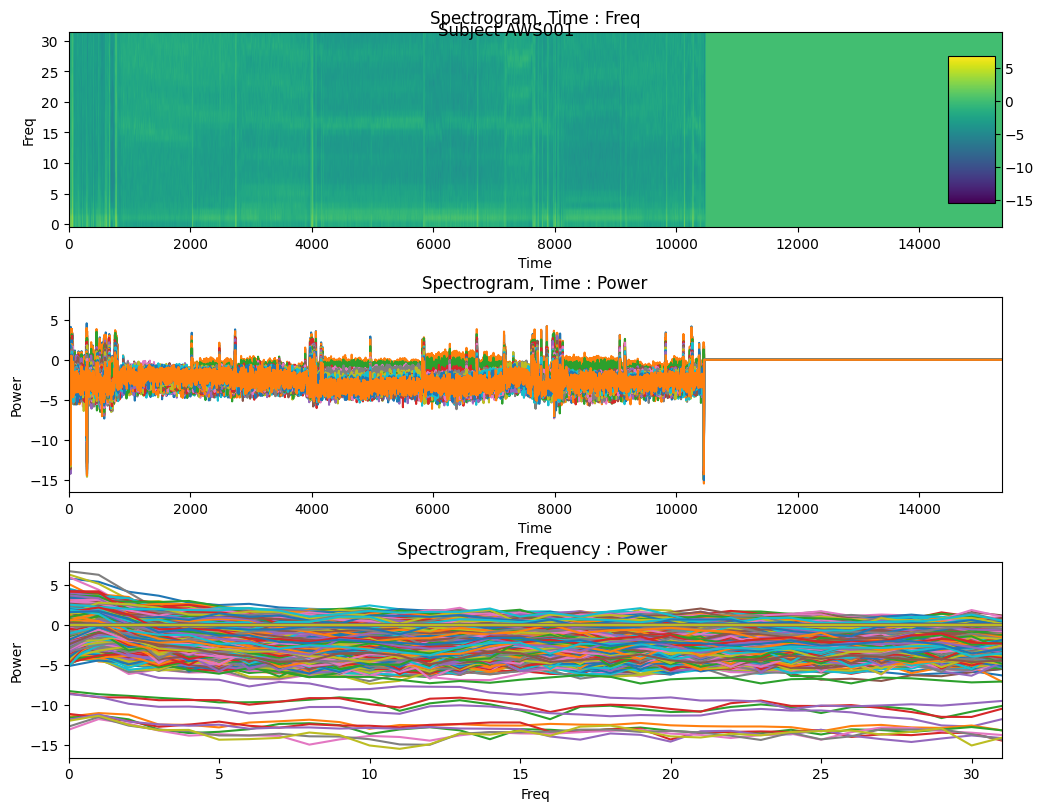

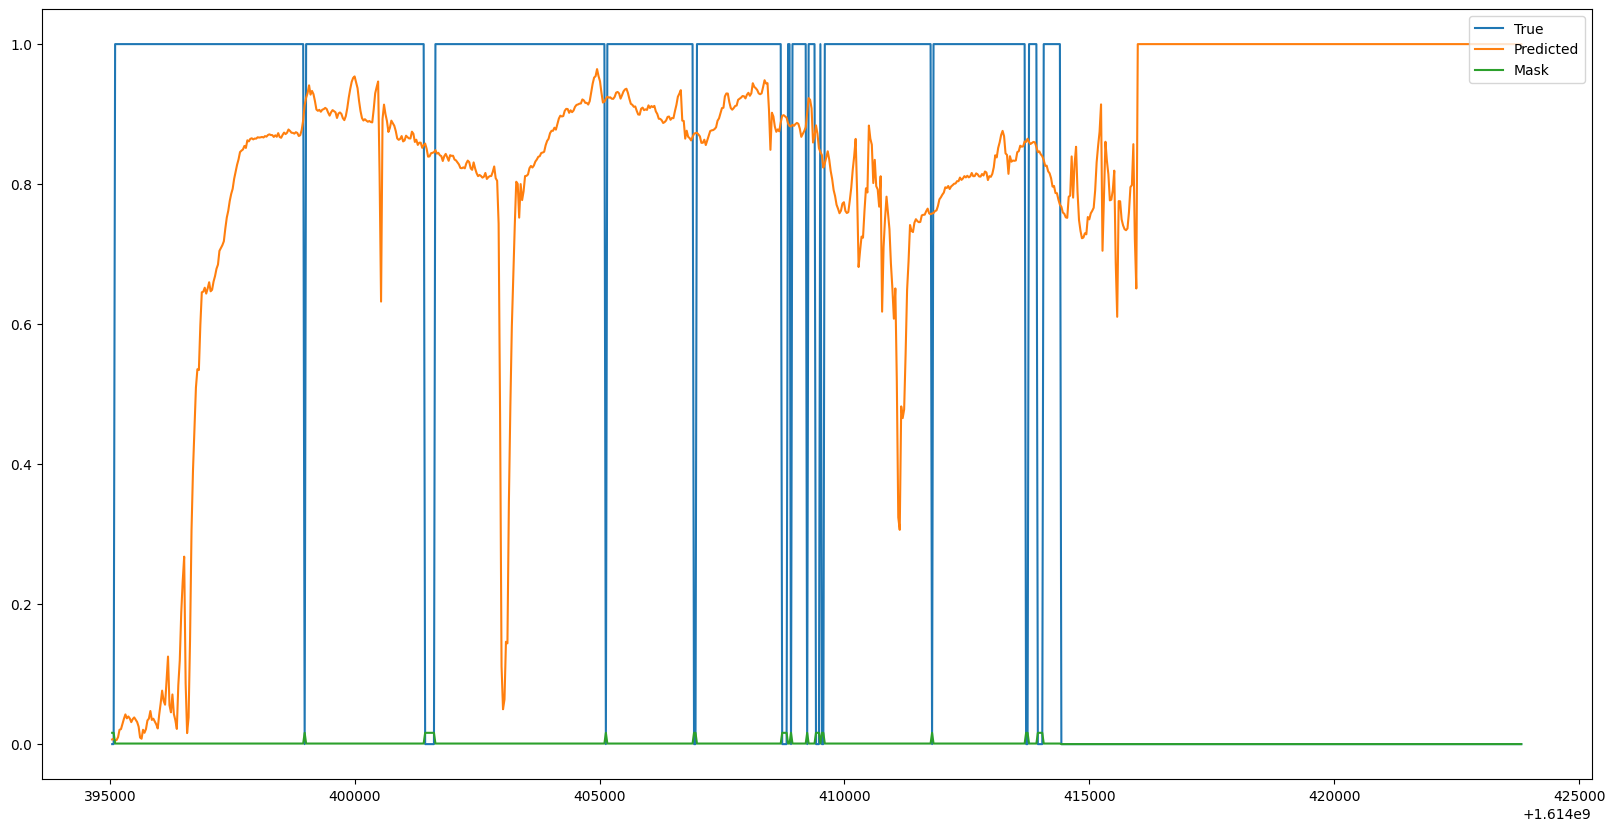

In [12]:
index = 0
prepro_data = mo_preprocessed_data_disordered
_, id = prepro_data[index]
psg = disordered.get_feature_data("psg", id)
psg_time = psg[:, 0].to_numpy()

plot_spectrogram(prepro_data, index)
# broken now that evaluations_walch is a dict
# think we want to just use 
plot_predictions(evaluations=evaluations_disordered, y_time=psg_time, idx=id)

## LOO + SGD Log Reg classifier
Adding LOOX can be achieved by training on 'walch_et_al' and testing on 'hybrid_data'.

In [16]:
disordered.get_feature_data("activity", id)

Timestamp,ads
f64,f64
1.6144e9,38.106515
1.6144e9,22.889142
1.6144e9,28.767091
1.6144e9,22.116105
1.6144e9,9.639162
…,…
1.6144e9,0.0
1.6144e9,0.0
1.6144e9,0.0


In [17]:

from pisces.models import LeaveOneOutSplitter, SGDLogisticRegression, run_splits

DATA_SET = disordered 
loo = LeaveOneOutSplitter()

split_models, log_reg_preprocessed_data, splits = run_splits(loo, DATA_SET, SGDLogisticRegression)

0it [00:20, ?it/s]


ValueError: need at least one array to concatenate

In [ ]:

from typing import Dict


log_reg_preprocessed_data_walch = [l for l in log_reg_preprocessed_data_walch if l[0] is not None]
log_reg_evaluations_walch: Dict[str, dict] = {}
for i, ((X, y), id) in enumerate(log_reg_preprocessed_data_walch):
    y_hat_proba = split_models[i].predict_probabilities(X)
    y_hat_sleep_proba = y_hat_proba[:, 1].reshape(-1,)
    y_prepped, _ = SGDLogisticRegression()._prepare_labels(y)
    try:
        analysis = split_analysis(y_prepped, y_hat_sleep_proba, balancing=False)
    except ValueError as e:
        print(f"Error processing {id}: {e}")
        continue
    log_reg_evaluations_walch[id] = analysis
    print(f"Processing {i+1} of {len(log_reg_preprocessed_data_walch)} ({id})... AUROC: {analysis['auc']}")
log_reg_aucs_walch = [e["auc"] for e in log_reg_evaluations_walch.values()]
log_reg_fprs_walch = [e["roc_curve"]["fprs"] for e in log_reg_evaluations_walch.values()]
log_reg_tprs_walch = [e["roc_curve"]["tprs"] for e in log_reg_evaluations_walch.values()]


/Users/eric/Engineering/Work/pisces/pisces/utils.py:410: UserWarning: y_hat is shorter than y by -42 elements, returning y unchanged
  warnings.warn(f"y_hat is shorter than y by {pad} elements, returning y unchanged")


Processing 1 of 30 (1066528)... AUROC: 0.7313864051904363
Error processing 1360686: Found input variables with inconsistent numbers of samples: [956, 914, 956]
Processing 3 of 30 (1449548)... AUROC: 0.7651504941599281
Processing 4 of 30 (1455390)... AUROC: 0.8265643310353556
Processing 5 of 30 (1818471)... AUROC: 0.8903707052441231
Processing 6 of 30 (2598705)... AUROC: 0.9057697351167059
Processing 7 of 30 (2638030)... AUROC: 0.8918916437098263
Processing 8 of 30 (3509524)... AUROC: 0.9220938375350143
Processing 9 of 30 (3997827)... AUROC: 0.9731768406337364
Processing 10 of 30 (4018081)... AUROC: 0.8927743765348833
Processing 11 of 30 (4314139)... AUROC: 0.8822221195281725
Processing 12 of 30 (4426783)... AUROC: 0.9644262714030163
Processing 13 of 30 (46343)... AUROC: 0.8684980413546886
Processing 14 of 30 (5132496)... AUROC: 0.6915966386554618
Processing 15 of 30 (5383425)... AUROC: 0.9763477147761324
Processing 16 of 30 (5498603)... AUROC: 0.8522793891851145
Processing 17 of 30 (57

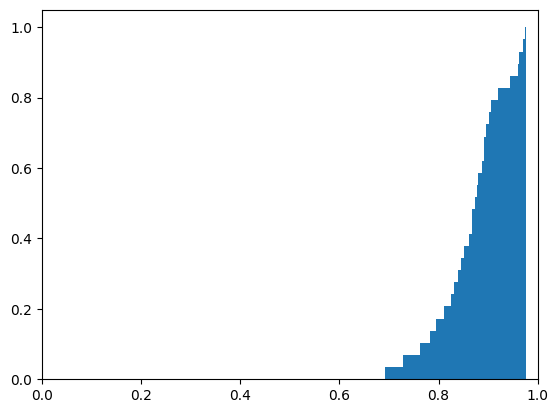

In [ ]:
plot_scores_CDF(log_reg_aucs_walch)

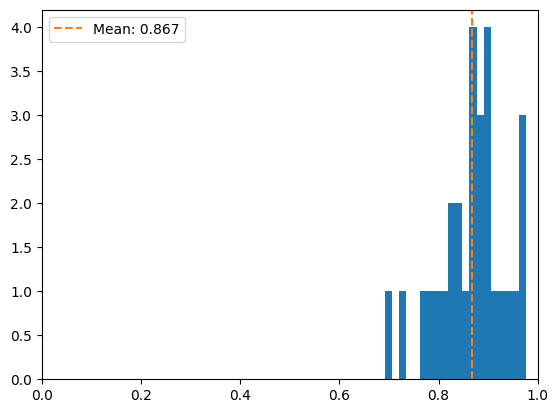

In [ ]:
plot_scores_PDF(log_reg_aucs_walch)

### Comparision: ROC

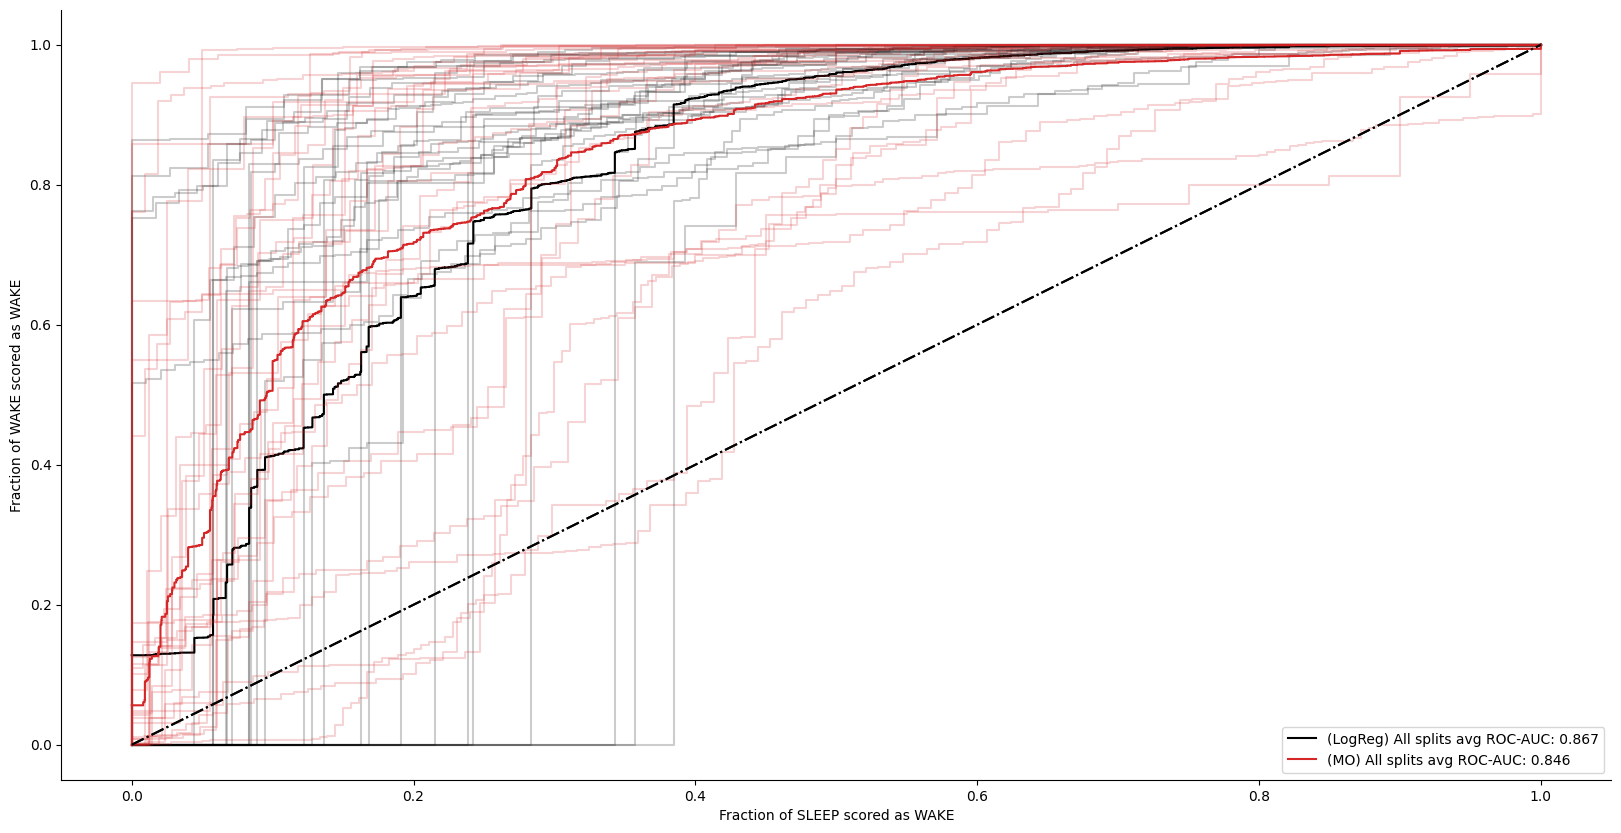

In [ ]:


fig, ax = plt.subplots(figsize=(20, 10))
lr_color = "black"
mo_color = "tab:red"

add_rocs(
    fprs=log_reg_fprs_walch, 
    tprs=log_reg_tprs_walch,
    avg_curve_color=lr_color,
    specific_curve_color=lr_color,
    roc_group_name="(LogReg)",
    ax=ax,
    min_auc=0.5,
)

add_rocs(
    fprs=mo_fprs_walch,
    tprs=mo_tprs_walch,
    avg_curve_color=mo_color,
    specific_curve_color=mo_color,
    roc_group_name="(MO)",
    ax=ax,
    min_auc=0.5,
)
ax.legend(loc='lower right')